In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('../../data/data.csv')
df.head()

,treatment_id,date_of_introduction,observation_date,initial_female_count,leaf_area_cm2,population_density,replicate_id,cumulative_mite_count,number_of_eggs,no_of_eggs_hatched,male_count,female_count
0,T1R1,7/31/2019,8/1/2019,1,0.5,2.0,1,0,0,0,0,0
1,T1R1,7/31/2019,8/2/2019,1,0.5,2.0,1,0,0,0,0,0
2,T1R1,7/31/2019,8/3/2019,1,0.5,2.0,1,2,3,2,0,2
3,T1R1,7/31/2019,8/4/2019,1,0.5,2.0,1,6,4,4,0,4
4,T1R1,7/31/2019,8/5/2019,1,0.5,2.0,1,9,4,3,0,3


In [3]:
# Convert date columns to datetime
df[["observation_date", "date_of_introduction"]] = df[["observation_date", "date_of_introduction"]].apply(
    pd.to_datetime
)
# drop columns that are not needed for modeling
df.drop(columns=["treatment_id", "replicate_id"], inplace=True)
df.head()

,date_of_introduction,observation_date,initial_female_count,leaf_area_cm2,population_density,cumulative_mite_count,number_of_eggs,no_of_eggs_hatched,male_count,female_count
0,2019-07-31,2019-08-01,1,0.5,2.0,0,0,0,0,0
1,2019-07-31,2019-08-02,1,0.5,2.0,0,0,0,0,0
2,2019-07-31,2019-08-03,1,0.5,2.0,2,3,2,0,2
3,2019-07-31,2019-08-04,1,0.5,2.0,6,4,4,0,4
4,2019-07-31,2019-08-05,1,0.5,2.0,9,4,3,0,3


In [4]:
df.columns

Index(['date_of_introduction', 'observation_date', 'initial_female_count',
       'leaf_area_cm2', 'population_density', 'cumulative_mite_count',
       'number_of_eggs', 'no_of_eggs_hatched', 'male_count', 'female_count'],
      dtype='object')

#### Baseline Linear Regression Model

In [5]:
features = ['initial_female_count','leaf_area_cm2', 'population_density']
target = 'cumulative_mite_count'

X = df[features]
y = df[target]

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Create and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)
# --- 4. Make Predictions and Evaluate the Model ---
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- 5. Print the Results ---
print("--- Baseline Linear Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

--- Baseline Linear Regression Model Performance ---
Mean Absolute Error (MAE): 79.6681
Mean Squared Error (MSE): 11698.4329
Root Mean Squared Error (RMSE): 108.1593
R-squared (R²): 0.4103


## Feature Engeneering

In [6]:
# create number of days since introduction feature
df['days_since_introduction'] = (df['observation_date'] - df['date_of_introduction']).dt.days

# Initial Growth Potential
df['initial_growth_potential'] = df['initial_female_count'] * df['leaf_area_cm2']

#### Linear Regression with Feature Engineering

In [7]:
features = ['initial_female_count','leaf_area_cm2', 'population_density',"days_since_introduction", 'initial_growth_potential']
target = 'cumulative_mite_count'

X = df[features]
y = df[target]

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Create and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)
# --- 4. Make Predictions and Evaluate the Model ---
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- 5. Print the Results ---
print("--- Feature introdused Linear Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

--- Feature introdused Linear Regression Model Performance ---
Mean Absolute Error (MAE): 59.2000
Mean Squared Error (MSE): 6090.8817
Root Mean Squared Error (RMSE): 78.0441
R-squared (R²): 0.6929


Feature Importance: {'initial_female_count': 14.776375673804248, 'leaf_area_cm2': 22.421735329717702, 'population_density': 13.347176026638246, 'days_since_introduction': 13.840216651089374, 'initial_growth_potential': -1.3761190860632944}


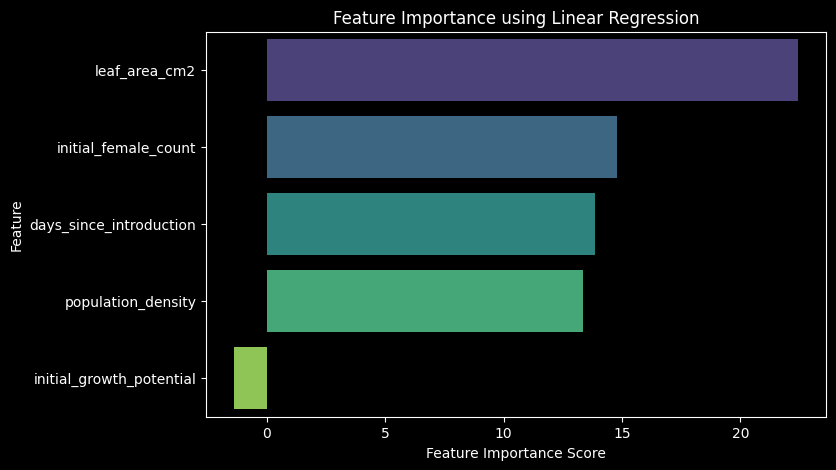

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Model Coefficients
print("Feature Importance:", dict(zip(X.columns, model.coef_)))

# Extract Feature Importances from Linear Regression Coefficients
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance using Linear Regression")
plt.show()

### Adding plolynominal features

#### Polynomial Regression for Non-Linear Relationships

In [9]:
from sklearn.preprocessing import PolynomialFeatures

features = ['initial_female_count','leaf_area_cm2', 'population_density',"days_since_introduction", 'initial_growth_potential']
target = 'cumulative_mite_count'

X = df[features]
y = df[target]

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# --- 3. Create and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)
# --- 4. Make Predictions and Evaluate the Model ---
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- 5. Print the Results ---
print("--- Polynominal Feature introdused Linear Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

--- Polynominal Feature introdused Linear Regression Model Performance ---
Mean Absolute Error (MAE): 35.5555
Mean Squared Error (MSE): 3396.0276
Root Mean Squared Error (RMSE): 58.2754
R-squared (R²): 0.8288


using StandardScaler

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

features = ['initial_female_count','leaf_area_cm2', 'population_density',"days_since_introduction", 'initial_growth_potential']
target = 'cumulative_mite_count'

X = df[features]
y = df[target]

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a scaler and fit it ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the FITTED scaler
X_test_scaled = scaler.transform(X_test)

# --- 3. Create and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# --- 4. Make Predictions and Evaluate the Model ---
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- 5. Print the Results ---
print("--- Polynominal Feature introdused Linear Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

--- Polynominal Feature introdused Linear Regression Model Performance ---
Mean Absolute Error (MAE): 35.1889
Mean Squared Error (MSE): 3361.5287
Root Mean Squared Error (RMSE): 57.9787
R-squared (R²): 0.8305


#### Polynomial Regression with Logarithmic Transformation

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np

df_transformed = df.copy()

# List of skewed features to transform
skewed_features = ['initial_growth_potential','days_since_introduction']

# Apply log transformation
for feat in skewed_features:
    df_transformed[feat] = np.log1p(df_transformed[feat])

features = ['initial_female_count','leaf_area_cm2', 'population_density',"days_since_introduction", 'initial_growth_potential']
target = 'cumulative_mite_count'

X = df_transformed[features]
y = np.log1p(df['cumulative_mite_count'])

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a scaler and fit it ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the FITTED scaler
X_test_scaled = scaler.transform(X_test)

# --- 3. Create and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# --- 4. Make Predictions and Evaluate the Model ---
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- 5. Print the Results ---
print("--- Polynominal Feature introdused Linear Regression Model Performance  log transformed---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# We use np.expm1 as it is the inverse of np.log1p
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

print("\n--- Model Performance on the ORIGINAL Scale (Interpretable) ---")
mae1 = mean_absolute_error(y_test_original, y_pred_original)
mse1 = mean_squared_error(y_test_original, y_pred_original)
rmse1 = root_mean_squared_error(y_test_original, y_pred_original)
r21 = r2_score(y_test_original, y_pred_original)
print(f"Mean Absolute Error (MAE): {mae1:.4f} mites")
print(f"Mean Squared Error (MSE): {mse1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.4f} mites")
print(f"R-squared (R²): {r21:.4f}")

--- Polynominal Feature introdused Linear Regression Model Performance  log transformed---
Mean Absolute Error (MAE): 0.3367
Mean Squared Error (MSE): 0.3730
Root Mean Squared Error (RMSE): 0.6107
R-squared (R²): 0.8393

--- Model Performance on the ORIGINAL Scale (Interpretable) ---
Mean Absolute Error (MAE): 7442.3472 mites
Mean Squared Error (MSE): 41611911890.8336
Root Mean Squared Error (RMSE): 203989.9799 mites
R-squared (R²): -2097725.9544


it shows drasting differnt in orginal matrics so let's investicate outliers

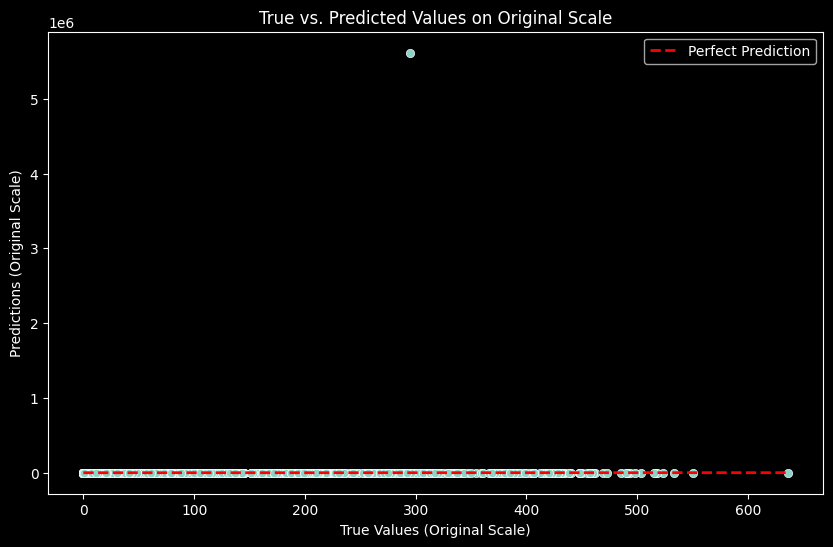

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you have these from your previous script:
# y_test_original
# y_pred_original

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("True Values (Original Scale)")
plt.ylabel("Predictions (Original Scale)")
plt.title("True vs. Predicted Values on Original Scale")
plt.legend()
plt.show()

one single pradiction make bigg error while transform the te result to original scale it refleccts in a big amount so let's remove it

In [13]:
# Create a DataFrame to easily see the worst predictions
results_df = pd.DataFrame({
    'true_value': y_test_original,
    'predicted_value': y_pred_original
})
results_df['absolute_error'] = abs(results_df['true_value'] - results_df['predicted_value'])

# Sort to see the 10 worst predictions
worst_predictions = results_df.sort_values(by='absolute_error', ascending=False)

worst_predictions

,true_value,predicted_value,absolute_error
2092,295.0,5.616506e+06,5.616211e+06
1702,636.0,9.445920e+01,5.415408e+02
2383,517.0,1.149670e+02,4.020330e+02
1688,432.0,5.704677e+01,3.749532e+02
1697,503.0,1.603460e+02,3.426540e+02
...,...,...,...
1322,11.0,1.087697e+01,1.230255e-01
2732,40.0,3.990984e+01,9.016417e-02
1779,48.0,4.804871e+01,4.871397e-02
1550,187.0,1.869731e+02,2.689926e-02


In [14]:
# --- 6. Remove the Identified Outlier and Re-Evaluate ---

print("\n--- Re-evaluating the model after removing the single outlier ---")

# 1. Identify the index of the outlier from your previous analysis
outlier_index = 2092

# 2. Create new test sets by removing the outlier
y1_test_no_outlier = y_test.drop(outlier_index)

# To remove the outlier from the X_test array, we need its positional index
outlier_position = y_test.index.get_loc(outlier_index)
X_test_scaled_no_outlier = np.delete(X_test_scaled, outlier_position, axis=0)

print(f"Original test set size: {len(y_test)}")
print(f"New test set size: {len(y1_test_no_outlier)}")


# 3. Make new predictions on the cleaned test set
y1_pred_log_no_outlier = model.predict(X_test_scaled_no_outlier)


# 4. Transform the new predictions and labels back to the original scale
y1_pred_original_no_outlier = np.expm1(y1_pred_log_no_outlier)
y1_test_original_no_outlier = np.expm1(y1_test_no_outlier)


# 5. Recalculate and print the new metrics
mae_new = mean_absolute_error(y1_test_original_no_outlier, y1_pred_original_no_outlier)
mse_new = mean_squared_error(y1_test_original_no_outlier, y1_pred_original_no_outlier)
rmse_new = root_mean_squared_error(y1_test_original_no_outlier, y1_pred_original_no_outlier)
r2_new = r2_score(y1_test_original_no_outlier, y1_pred_original_no_outlier)
# --- 7. Final Comparison ---

print("\n--- Performance Comparison ---")
print("                  BEFORE removing outlier   |   AFTER removing outlier")
print("-------------------------------------------------------------------------")
print(f"Mean Absolute Error: {mae1:20.4f}      |   {mae_new:20.4f}")
print(f"Mean Squared Error: {mse1:20.4f}      |   {mse_new:20.4f}")
print(f"Root Mean Squared Error: {rmse1:16.4f}  |   {rmse_new:20.4f}")
print(f"R-squared (R²): {r21:21.4f}      |   {r2_new:20.4f}")


--- Re-evaluating the model after removing the single outlier ---
Original test set size: 758
New test set size: 757

--- Performance Comparison ---
                  BEFORE removing outlier   |   AFTER removing outlier
-------------------------------------------------------------------------
Mean Absolute Error:            7442.3472      |                33.1415
Mean Squared Error:     41611911890.8336      |              3354.3017
Root Mean Squared Error:      203989.9799  |                57.9163
R-squared (R²):         -2097725.9544      |                 0.8309


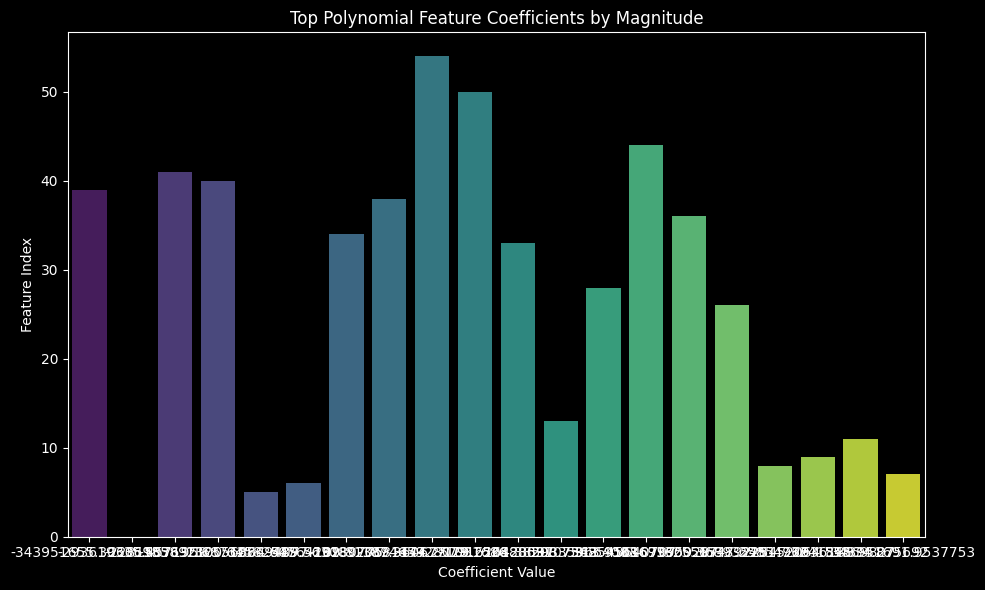

Note: Original features have been transformed into polynomial features.
Original features were: ['initial_female_count', 'leaf_area_cm2', 'population_density', 'days_since_introduction', 'initial_growth_potential']


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# For polynomial models, we can't directly map coefficients to original features
# because there are interactions and higher powers
# Instead, we can show the top coefficients by magnitude

# Get coefficients and their absolute values
coeffs = model.coef_
abs_coeffs = np.abs(coeffs)

# Get indices of top N coefficients by magnitude
top_n = min(20, len(coeffs))  # Show at most 20 features
top_indices = np.argsort(abs_coeffs)[-top_n:]

# Create dataframe for plotting
coef_df = pd.DataFrame({
    'Feature Index': top_indices,
    'Coefficient': coeffs[top_indices]
}).sort_values('Coefficient', ascending=False)

# Plot top coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature Index', data=coef_df, palette='viridis')
plt.title('Top Polynomial Feature Coefficients by Magnitude')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()

# Print original feature importance (for reference only)
print("Note: Original features have been transformed into polynomial features.")
print("Original features were:", features)

In [16]:
# Assuming 'poly' is your fitted PolynomialFeatures object and 'model' is your trained LinearRegression model

# Get the feature names generated by PolynomialFeatures
poly_feature_names = poly.get_feature_names_out(features)

# Create a DataFrame of the coefficients
df_coeffs = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': model.coef_
})

# Sort the coefficients by their absolute value to see the most impactful ones
df_coeffs['Abs_Coefficient'] = df_coeffs['Coefficient'].abs()
df_coeffs = df_coeffs.sort_values(by='Abs_Coefficient', ascending=False)

print("--- Top 10 Most Impactful Features (from Coefficients) ---")
print(df_coeffs.head(10))

--- Top 10 Most Impactful Features (from Coefficients) ---
                                              Feature   Coefficient  \
7             initial_female_count population_density  3.439517e+08   
39                 leaf_area_cm2 population_density^2 -3.439517e+08   
0                                initial_female_count -2.936193e+08   
11                   leaf_area_cm2 population_density  2.936188e+08   
9       initial_female_count initial_growth_potential  2.281521e+08   
41  leaf_area_cm2 population_density initial_growt... -2.281508e+08   
8        initial_female_count days_since_introduction  1.538923e+08   
40  leaf_area_cm2 population_density days_since_in... -1.538921e+08   
5                              initial_female_count^2 -1.325569e+08   
26  initial_female_count leaf_area_cm2 population_...  1.325567e+08   

    Abs_Coefficient  
7      3.439517e+08  
39     3.439517e+08  
0      2.936193e+08  
11     2.936188e+08  
9      2.281521e+08  
41     2.281508e+08  
8    

Using 3028 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 758/758 [31:46<00:00,  2.52s/it]



--- SHAP Summary Plot ---


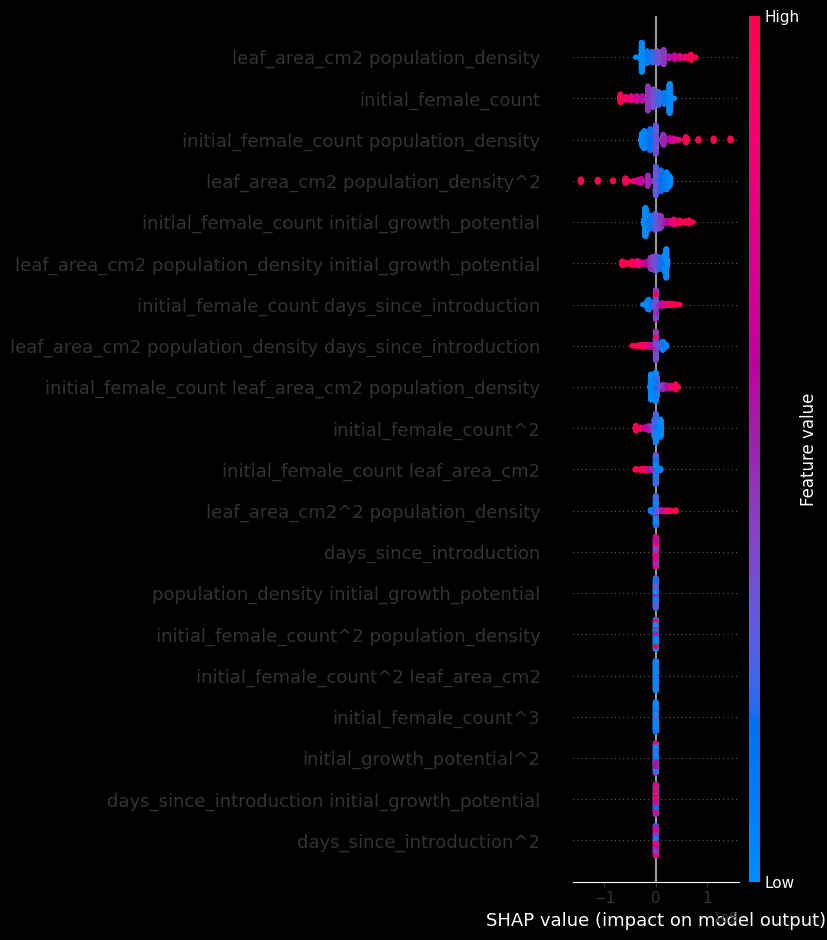

In [17]:
import shap

# --- Prerequisite: Your Final Model ---
# Ensure you have your final trained model ('model')
# and your scaled training and testing data (X_train_scaled, X_test_scaled)
# Note: SHAP works best on scaled data for this type of explainer.

# 1. Create a SHAP Explainer
# We use KernelExplainer, which is model-agnostic. We give it the model's predict function
# and a summary of the training data (a "background" dataset) to learn from.
explainer = shap.KernelExplainer(model.predict, X_train_scaled)

# 2. Calculate SHAP values for the test set (this can take a moment)
shap_values = explainer.shap_values(X_test_scaled)

# 3. Create the Summary Plot
# This is the most powerful SHAP visualization.
print("\n--- SHAP Summary Plot ---")
shap.summary_plot(shap_values, X_test_scaled, feature_names=poly_feature_names)

In [18]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred)

r2_score_test = r2_score(y_test, y_pred)
r2_score_train = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_score_train:.4f}, Test R²: {r2_score_test:.4f}")

Train RMSE: 0.2284, Test RMSE: 0.3730
Train R²: 0.9045, Test R²: 0.8393
